In [2]:
import os
from glob import glob
import random
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannot import add_stat_annotation

Button

In [8]:
test_type = 'opt'
windows = False

if windows:
    base_dir = 'C:\\Users\\Na Min An\\Desktop\\Development\\ArtificialVision'
    slash = '\\'
else:
    base_dir = '/Volumes/Seagate/Development/ArtificialVision'
    slash = '/'

num_class = 16
if test_type == 'opt':
  sel_ppl = list(range(300, 309)) + list(range(400, 408)) + [611]
elif test_type == 'elec': # check
  sel_ppl = [499, 500] + list(range(502, 509)) + list(range(601, 607)) + list(range(608, 611)) # 18 subjects

quesdata_files = glob(f'{base_dir}{slash}data{slash}Question_Banks_AI_Hub_final{slash}{num_class}classes{slash}set0{slash}*')
humdata_path = glob(f'{base_dir}{slash}data{slash}Human_Expert{slash}211202')[0]
humsub_path = glob(f'{base_dir}{slash}data{slash}210827_ANNA_Removing_uncontaminated_data.csv')[0]
answer_path = glob(f'{base_dir}{slash}data{slash}211105_QAs_for_Set0_CNN_SVC_4classes_partial.csv')[0]
testdata_path = glob(f'{base_dir}{slash}data{slash}sample_for_dev_test_{test_type}')[0]
fig_path = glob(f'{base_dir}{slash}figures')[0]

Human Data

In [9]:
human_df = pd.DataFrame()
n = 9
for i in range(1, 80*n+1, 80):
    try:
      j = i+79
      temp_df = pd.read_csv(os.path.join(humdata_path, f'main_test({i}_{j}).csv'))
      if i == 1:
        pass
      else:
        temp_df = temp_df.rename(columns = {'유저식별아이디':'useless', 'MC구분':'useless', '성별':'useless', '나이':'useless', '학력':'useless'})
      human_df = pd.concat([human_df, temp_df], axis=1)
    except:
      print(i)

human_df = human_df[human_df['유저식별아이디'].isin(sel_ppl)]
orig_human_df = human_df
orig_human_df

,유저식별아이디,나이,성별,학력,시력,참여일자,MC구분,선택_A_1,시간_A_1,확신_1,...,선택_A_719,시간_A_719,확신_719,선택_B_719,시간_B_719,선택_A_720,시간_A_720,확신_720,선택_B_720,시간_B_720
51,300.0,23.0,2.0,대졸,0.0,2021-11-18 10:10,1,NaN,0.00,NaN,...,19081632.0,1.22,1.0,NaN,0.00,19071131.0,1.95,1.0,NaN,0.00
52,301.0,24.0,1.0,박사,0.0,2021-11-18 10:11,2,19070522.0,3.23,1.0,...,19081632.0,1.46,1.0,NaN,0.00,19071131.0,0.98,1.0,NaN,0.00
53,303.0,28.0,2.0,석사,0.0,2021-11-18 13:10,3,19070311.0,3.44,1.0,...,19081632.0,0.69,1.0,NaN,0.00,19071131.0,1.65,1.0,NaN,0.00
54,302.0,32.0,1.0,석사,0.0,2021-11-18 13:10,1,19070311.0,3.52,NaN,...,19081632.0,1.72,1.0,NaN,0.00,19071131.0,1.61,1.0,NaN,0.00
55,304.0,27.0,1.0,대졸,0.0,2021-11-18 13:12,2,19071131.0,2.24,NaN,...,19081632.0,2.26,1.0,NaN,0.00,19090222.0,2.28,NaN,19081421.0,0.81
56,305.0,27.0,1.0,대졸,0.0,2021-11-18 16:10,3,19070311.0,3.13,1.0,...,19081632.0,1.47,1.0,NaN,0.00,19071131.0,1.32,1.0,NaN,0.00
57,307.0,34.0,2.0,박사,0.0,2021-11-18 16:11,1,19090631.0,2.73,1.0,...,19081632.0,2.43,1.0,NaN,0.00,19071131.0,0.75,1.0,NaN,0.00
58,306.0,24.0,2.0,석사,0.0,2021-11-18 16:12,2,19071131.0,1.25,1.0,...,19081632.0,0.90,1.0,NaN,0.00,19081421.0,0.11,NaN,19071131.0,0.14
59,308.0,37.0,2.0,박사,0.0,2021-11-18 16:12,3,19092711.0,4.55,NaN,...,19081632.0,1.21,1.0,NaN,0.00,19071131.0,0.72,1.0,NaN,0.00
60,401.0,28.0,1.0,석사,0.0,2021-11-24 10:06,1,19070311.0,4.67,NaN,...,19081632.0,2.84,NaN,19070231.0,1.11,19071131.0,2.92,1.0,NaN,0.00


Answer Data

In [10]:
answer_df = pd.read_csv(answer_path)

act_per_list, pix_list, gs_list, par_list = [], [], [], []
for answer in answer_df['Answer']:
    img, _ = answer.split('.jpg')
    act_per, pix, gs, par = img.split('_')
    
    act_per_list.append(act_per)
    pix_list.append(pix)
    gs_list.append(gs)
    par_list.append(par)

answer_df['act_per'] = act_per_list
answer_df['PIX'] = pix_list
answer_df['GS'] = gs_list
answer_df['par'] = par_list

answer_df = answer_df[:80*n]
answer_df = answer_df.T

orig_answer_df = answer_df
answer_df

,0,1,2,3,4,5,6,7,8,9,...,710,711,712,713,714,715,716,717,718,719
Answer,19070311_16PIX_8GS_S001L1E03C7.jpg,19080133_32PIX_4GS_S001L1E03C7.jpg,19090222_32PIX_8GS_S001L1E01C4.jpg,19090631_16PIX_2GS_S001L1E03C7.jpg,19072221_32PIX_2GS_S001L1E01C4.jpg,19072221_64PIX_4GS_S001L1E03C7.jpg,19081632_64PIX_2GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19070522_16PIX_4GS_S001L1E03C7.jpg,19081421_32PIX_2GS_S001L1E01C7.jpg,...,19090631_32PIX_8GS_S001L1E01C7.jpg,19070231_64PIX_4GS_S001L1E03C7.jpg,19090222_16PIX_4GS_S001L1E03C7.jpg,19080133_32PIX_8GS_S001L1E01C7.jpg,19081421_32PIX_2GS_S001L1E01C4.jpg,19072221_16PIX_8GS_S001L1E01C7.jpg,19082131_16PIX_2GS_S001L1E01C7.jpg,19092521_32PIX_4GS_S001L1E01C7.jpg,19081632_64PIX_2GS_S001L1E01C7.jpg,19071131_64PIX_8GS_S001L1E01C7.jpg
MC1,"[19090631, 19070311, 19082032, 19071821]","[19090631, 19090222, 19070522, 19080133]","[19072922, 19071821, 19090222, 19070231]","[19070522, 19090222, 19080133, 19090631]","[19070231, 19070311, 19092521, 19072221]","[19082131, 19072221, 19070311, 19070522]","[19082032, 19081632, 19071131, 19092711]","[19092711, 19070231, 19082032, 19070311]","[19092521, 19072922, 19070311, 19070522]","[19081421, 19071131, 19081632, 19072922]",...,"[19081632, 19080133, 19090631, 19092711]","[19070231, 19080133, 19072922, 19071821]","[19081632, 19092711, 19070231, 19090222]","[19072922, 19072221, 19080133, 19090631]","[19082032, 19072221, 19090631, 19081421]","[19070231, 19092521, 19072221, 19080133]","[19092711, 19090631, 19082131, 19092521]","[19092521, 19070231, 19082131, 19090631]","[19092521, 19081632, 19070231, 19070522]","[19081421, 19090222, 19071131, 19082032]"
MC1_hit_rate,1,1,1,1,1,1,1,1,1,1,...,0.666667,1,1,1,1,1,1,1,1,1
MC2,"[19070311, 19071131, 19082131, 19070522]","[19081632, 19080133, 19071821, 19082032]","[19090222, 19081421, 19070311, 19070522]","[19090631, 19070231, 19090222, 19072221]","[19072922, 19071821, 19072221, 19081632]","[19092711, 19072922, 19072221, 19090631]","[19072922, 19082131, 19081632, 19080133]","[19071821, 19082131, 19092711, 19080133]","[19081421, 19070522, 19072221, 19081632]","[19072221, 19080133, 19070522, 19081421]",...,"[19071821, 19070231, 19092521, 19090631]","[19070231, 19081421, 19092521, 19072221]","[19090631, 19090222, 19071131, 19092711]","[19081632, 19072221, 19092521, 19080133]","[19081421, 19071131, 19072922, 19092711]","[19081421, 19092711, 19072221, 19071131]","[19090222, 19070231, 19082131, 19080133]","[19071821, 19081632, 19092521, 19072922]","[19082032, 19081632, 19071821, 19090222]","[19081632, 19082032, 19071131, 19092711]"
MC2_hit_rate,1,1,1,1,1,1,0.888889,1,1,0.111111,...,0,1,1,1,0.888889,1,0.888889,0.888889,1,1
MC3,"[19070311, 19092711, 19082032, 19090222]","[19080133, 19081421, 19071131, 19070231]","[19090222, 19071821, 19082032, 19082131]","[19070311, 19071131, 19090631, 19080133]","[19070522, 19092521, 19072922, 19072221]","[19071821, 19090222, 19090631, 19072221]","[19092711, 19070311, 19081632, 19071821]","[19092711, 19082032, 19090222, 19080133]","[19071131, 19082032, 19070231, 19070522]","[19082032, 19090631, 19081421, 19092521]",...,"[19080133, 19081421, 19090631, 19070231]","[19071821, 19070231, 19082131, 19092711]","[19090222, 19071821, 19090631, 19071131]","[19072221, 19080133, 19071131, 19070231]","[19081421, 19071821, 19070522, 19072922]","[19090631, 19082032, 19072221, 19071821]","[19081632, 19082131, 19092521, 19092711]","[19081632, 19070231, 19092521, 19081421]","[19070522, 19071131, 19081632, 19070311]","[19072922, 19071821, 19070231, 19071131]"
MC3_hit_rate,0.111111,0,0.888889,0.222222,0,0.888889,0,0.666667,0.111111,0,...,0,1,0.444444,0.333333,0,0.333333,0,0,0.222222,0.888889
act_per,19070311,19080133,19090222,19090631,19072221,19072221,19081632,19092711,19070522,19081421,...,19090631,19070231,19090222,19080133,19081421,19072221,19082131,19092521,19081632,19071131
PIX,16PIX,32PIX,32PIX,16PIX,32PIX,64PIX,64PIX,64PIX,16PIX,32PIX,...,32PIX,64PIX,16PIX,32PIX,32PIX,16PIX,16PIX,32PIX,64PIX,64PIX
GS,8GS,4GS

Preprocessed Human Data

In [11]:
human_df = orig_human_df.copy()
human_df = human_df.fillna(0)
human_df['유저식별아이디'] = human_df['유저식별아이디'].astype(int)
human_df.index = human_df['유저식별아이디']

sel_col = []
for (i, col) in enumerate(human_df.columns):
    split = col.split('_')
    if split[0] == '선택' and split[1] == 'A':
        sel_col.append(col)
    
acc_df = human_df[sel_col]
acc_df.columns = [n for n in range(acc_df.shape[1])]
acc_df = acc_df.astype(int)

for q in range(acc_df.shape[1]):
    act_per = answer_df.loc['act_per'][q] 
    for s in range(acc_df.shape[0]):
        pred_per = acc_df.iloc[s, q]
        try:
            if str(int(pred_per)) == str(int(act_per)):
                acc_df.iloc[s, q] = 1
            else:
                acc_df.iloc[s, q] = 0
        except:
            acc_df.iloc[s, q] = 0

acc_df.columns = answer_df.T['Answer']
acc_df

Answer,19070311_16PIX_8GS_S001L1E03C7.jpg,19080133_32PIX_4GS_S001L1E03C7.jpg,19090222_32PIX_8GS_S001L1E01C4.jpg,19090631_16PIX_2GS_S001L1E03C7.jpg,19072221_32PIX_2GS_S001L1E01C4.jpg,19072221_64PIX_4GS_S001L1E03C7.jpg,19081632_64PIX_2GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19070522_16PIX_4GS_S001L1E03C7.jpg,19081421_32PIX_2GS_S001L1E01C7.jpg,...,19090631_32PIX_8GS_S001L1E01C7.jpg,19070231_64PIX_4GS_S001L1E03C7.jpg,19090222_16PIX_4GS_S001L1E03C7.jpg,19080133_32PIX_8GS_S001L1E01C7.jpg,19081421_32PIX_2GS_S001L1E01C4.jpg,19072221_16PIX_8GS_S001L1E01C7.jpg,19082131_16PIX_2GS_S001L1E01C7.jpg,19092521_32PIX_4GS_S001L1E01C7.jpg,19081632_64PIX_2GS_S001L1E01C7.jpg,19071131_64PIX_8GS_S001L1E01C7.jpg
유저식별아이디,,,,,,,,,,,,,,,,,,,,,
300,0,1,1,0,1,0,0,1,0,1,...,1,1,1,1,1,1,0,1,1,1
301,0,1,0,0,0,1,0,1,0,0,...,1,1,1,1,1,1,0,1,1,1
303,1,1,1,1,1,1,0,1,0,0,...,1,1,0,1,1,0,1,1,1,1
302,1,0,0,0,0,1,0,1,1,1,...,1,1,1,1,1,1,0,1,1,1
304,0,1,0,0,1,1,1,1,1,0,...,1,1,0,1,0,0,0,1,1,0
305,1,1,0,1,0,1,0,1,0,1,...,1,1,0,1,1,0,1,1,1,1
307,0,0,1,1,1,1,0,1,0,0,...,1,1,1,1,0,1,0,1,1,1
306,0,1,1,0,1,1,1,1,0,1,...,0,1,1,1,1,1,0,1,1,0
308,0,0,0,1,0,1,0,1,1,1,...,1,1,0,0,0,1,0,1,1,1


Machine Data

In [12]:
model_type1_list = [''] #['PCA', 'PCA', '', '']
model_type2_list = ['CNN_SVC'] #['SVC', 'LR', 'CNN_LR', 'CNN_SVC']
seed_list = [22, 77, 2, 100, 81, 42, 7, 1, 55, 50] 
pix_order_list = ['16PIX', '24PIX', '32PIX', '64PIX', '128PIX']
gs_order_list = ['2GS', '4GS', '6GS', '8GS', '16GS']

df = pd.read_csv(humsub_path)
l = list(range(df.shape[0]))
n = 16
random.seed(22)
set_1 = random.sample(l, n)
sets = [set_1]


for (model_type1, model_type2) in zip(model_type1_list, model_type2_list): # 제일 첫 번째 model에 대해서만
    model_type = model_type1 + model_type2
    input_folder = [df.iloc[i, 0] for i in sets[0]] 
    assert len(input_folder) == 16
    com_obj = itertools.combinations(input_folder, 16)
    com_list = list(com_obj)

    mac_df = pd.DataFrame()
    for i in range(len(quesdata_files)):
        data_path = quesdata_files[i]
        seed = int(os.path.basename(data_path).split('d')[-1])

        for n in range(len(os.listdir(data_path))):
            print(seed, n)

            preprocessed_data_path =  os.path.join(data_path, f'comb{n}') 
            high_analysis_path = os.path.join(preprocessed_data_path, f'High_Analysis_{test_type}')
            
            add_high_df = pd.read_csv(os.path.join(high_analysis_path, f'High_Level_Data_Analysis_{model_type1}_{model_type2}.csv'))
            add_high_df['Hit Rate'] = add_high_df['correctness'].replace(['correct', 'wrong'], [1, 0]) 
            add_high_df = add_high_df[['file_name', 'actual_person', 'Hit Rate']]
            add_high_df['actual_person'] = add_high_df['actual_person'].astype(int)
            
            img_list, hyperpar_list, par_list = [], [], []
            for i in range(add_high_df.shape[0]):
                file_name = add_high_df['file_name'][i].split('.')[0]
                pix, gs, par = file_name.split('_')
                per = add_high_df['actual_person'][i]
                img = str(per) + '_' + str(pix) + '_' + str(gs) + '_' + str(par) + '.jpg'
                img_list.append(img)
                hyperpar_list.append(str(pix) + '_' + str(gs))
                par_list.append(str(par))
            add_high_df['img'] = img_list
            add_high_df['hyperpar'] = hyperpar_list
            add_high_df['par'] = par_list
            
            add_high_df = add_high_df[['img', 'hyperpar', 'par', 'Hit Rate']]
        
        add_high_df['Seed'] = [seed] * add_high_df.shape[0]
        
        mac_df = pd.concat([mac_df, add_high_df], axis=0)

new_hyperpar_name_list = ['16PIX_2GS', '16PIX_4GS', '16PIX_8GS', 
                          '32PIX_2GS', '32PIX_4GS', '32PIX_8GS',  
                          '64PIX_2GS', '64PIX_4GS', '64PIX_8GS']
par_list = ['S001L1E01C4', 'S001L1E01C7', 'S001L1E01C10',
             'S001L1E02C7',
            'S001L1E03C7']
mac_df = mac_df[mac_df['hyperpar'].isin(new_hyperpar_name_list)]
mac_df = mac_df[mac_df['par'].isin(par_list)]

mac_df = mac_df.pivot(index='Seed', columns='img', values='Hit Rate')

mac_df

1 0
100 0
2 0
22 0
42 0
50 0
55 0
7 0
77 0
81 0


img,19070231_16PIX_2GS_S001L1E01C10.jpg,19070231_16PIX_2GS_S001L1E01C4.jpg,19070231_16PIX_2GS_S001L1E01C7.jpg,19070231_16PIX_2GS_S001L1E02C7.jpg,19070231_16PIX_2GS_S001L1E03C7.jpg,19070231_16PIX_4GS_S001L1E01C10.jpg,19070231_16PIX_4GS_S001L1E01C4.jpg,19070231_16PIX_4GS_S001L1E01C7.jpg,19070231_16PIX_4GS_S001L1E02C7.jpg,19070231_16PIX_4GS_S001L1E03C7.jpg,...,19092711_64PIX_4GS_S001L1E01C10.jpg,19092711_64PIX_4GS_S001L1E01C4.jpg,19092711_64PIX_4GS_S001L1E01C7.jpg,19092711_64PIX_4GS_S001L1E02C7.jpg,19092711_64PIX_4GS_S001L1E03C7.jpg,19092711_64PIX_8GS_S001L1E01C10.jpg,19092711_64PIX_8GS_S001L1E01C4.jpg,19092711_64PIX_8GS_S001L1E01C7.jpg,19092711_64PIX_8GS_S001L1E02C7.jpg,19092711_64PIX_8GS_S001L1E03C7.jpg
Seed,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,0,1,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
7,1,0,1,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
22,0,0,1,0,0,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
42,0,0,1,0,0,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
50,0,0,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
55,0,0,1,0,0,0,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
77,0,0,1,0,1,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
81,0,0,1,1,0,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


Merged Data

In [20]:
mer_df = pd.concat([acc_df, mac_df], join='inner')
mer_df = mer_df[mer_df.index != 'img']
mer_df = mer_df.transpose()

par_lst = []
for file_name in mer_df.index:
    split = file_name.split('.')
    face, pix, gs, par = split[0].split('_')
    par_lst.append(f'{pix}_{gs}')

mer_df['par'] = par_lst

temp_df = mer_df.groupby('par').mean()
temp_df.columns = ['human'] * len(sel_ppl) + ['machine'] * len(quesdata_files)
temp_df = temp_df.stack().reset_index()

temp_df.columns = ['par', 'model', 'hit_rate']
temp_df = temp_df[['par', 'model', 'hit_rate']]
temp_df

/opt/anaconda3/envs/namina/lib/python3.8/site-packages/pandas/core/indexes/base.py:122: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = op(self.values, np.asarray(other))


,300,301,303,302,304,305,307,306,308,401,...,1,2,7,22,42,50,55,77,81,100
par,,,,,,,,,,,,,,,,,,,,,
16PIX_2GS,0.4375,0.3875,0.4000,0.2750,0.3125,0.4750,0.3250,0.4750,0.3625,0.4500,...,0.2375,0.2125,0.1500,0.2000,0.2875,0.1500,0.3000,0.2250,0.2250,0.2250
16PIX_4GS,0.5000,0.3500,0.2750,0.3875,0.3750,0.4500,0.3625,0.4625,0.3125,0.4375,...,0.3375,0.3750,0.2875,0.3250,0.4125,0.3750,0.4250,0.3625,0.4500,0.4125
16PIX_8GS,0.5125,0.4375,0.4375,0.5875,0.5250,0.5375,0.5500,0.5125,0.4000,0.4250,...,0.4500,0.4750,0.3375,0.4500,0.5125,0.4375,0.5125,0.5000,0.5125,0.5250
32PIX_2GS,0.7125,0.5250,0.5250,0.6500,0.6250,0.7125,0.5000,0.7625,0.6250,0.5375,...,0.6125,0.5375,0.5250,0.4875,0.5500,0.5125,0.6250,0.5125,0.4750,0.4500
32PIX_4GS,0.8375,0.7125,0.6750,0.7250,0.6500,0.9375,0.6500,0.8000,0.6500,0.6750,...,0.7125,0.8125,0.6500,0.6750,0.7125,0.6875,0.7625,0.7250,0.7750,0.7375
32PIX_8GS,0.7625,0.8125,0.7500,0.8000,0.8000,0.9250,0.9125,0.9000,0.8125,0.6750,...,0.8125,0.8625,0.7625,0.7875,0.7375,0.7500,0.8500,0.7375,0.8250,0.7750
64PIX_2GS,0.7250,0.6750,0.7250,0.8500,0.7125,0.8125,0.7000,0.8125,0.8250,0.7875,...,0.8000,0.6875,0.6875,0.6000,0.6375,0.6375,0.7125,0.6500,0.5750,0.6125
64PIX_4GS,0.8750,0.7750,0.7750,0.8750,0.8250,0.9875,0.8375,0.9125,0.8750,0.7500,...,0.7750,0.8875,0.7375,0.7625,0.8000,0.8000,0.8250,0.8000,0.8250,0.8125
64PIX_8GS,0.9750,0.8125,0.8000,0.9125,0.8875,0.9750,0.9125,0.9500,0.9875,0.8750,...,0.9000,0.8750,0.8500,0.8500,0.8250,0.8500,0.8750,0.7875,0.8500,0.8625


Results

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

64PIX_8GS_human v.s. 64PIX_8GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.271e-01 U_stat=1.370e+02
16PIX_4GS_human v.s. 16PIX_4GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=9.600e+01
16PIX_2GS_human v.s. 16PIX_2GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.972e-03 U_stat=1.675e+02
16PIX_8GS_human v.s. 16PIX_8GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.950e+01
32PIX_2GS_human v.s. 32PIX_2GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.417e-01 U_stat=1.295e+02
32PIX_4GS_human v.s. 32PIX_4GS_machine: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=7.700e+01
32PIX_8G

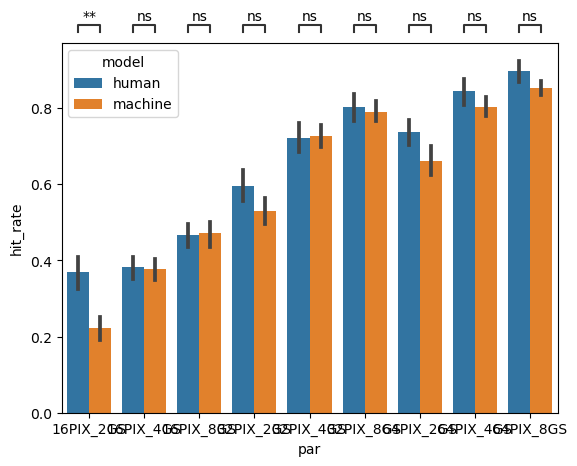

In [15]:
box_pairs=[
        (("16PIX_2GS", "human"), ("16PIX_2GS", "machine")),
        (("16PIX_4GS", "human"), ("16PIX_4GS", "machine")),
        (("16PIX_8GS", "human"), ("16PIX_8GS", "machine")),
        (("32PIX_2GS", "human"), ("32PIX_2GS", "machine")),
        (("32PIX_4GS", "human"), ("32PIX_4GS", "machine")),
        (("32PIX_8GS", "human"), ("32PIX_8GS", "machine")),
        (("64PIX_2GS", "human"), ("64PIX_2GS", "machine")),
        (("64PIX_4GS", "human"), ("64PIX_4GS", "machine")),
        (("64PIX_8GS", "human"), ("64PIX_8GS", "machine")),
    ]
plot = sns.barplot(data=temp_df,
                   x='par',
                   y='hit_rate',
                   hue='model')
plot, test_results = add_stat_annotation(plot,
                                         data=temp_df,
                                         x='par',
                                         y='hit_rate',
                                         hue='model',
                                         box_pairs=box_pairs,
                                         test='Mann-Whitney', text_format='star', loc='outside', verbose=1)
plt.show()

In [31]:
temp_df.to_csv(os.path.join(fig_path, f'parallel_{test_type}_{model_type}_{num_class}.csv'))